## Análisis de datos - Clase 2

### Medidas estadísticas descriptivas 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
# Cargamos el dataset de Titanic viene incluido en la biblioteca Seaborn
titanic_df = sns.load_dataset('titanic') # sns.load_dataset Devuelve un Pandas DF
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Creamos un dataset reducido, con la edad del pasajero, el costo del pasaje 
# y una columna (sibsp) que indica cuántos de sus familiares (hermanos o esposo/a) 
# había a bordo.

df = titanic_df[['age', 'fare', 'sibsp']].dropna() # Eliminamos los datos nulos con dropna()
df

,age,fare,sibsp
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,0
886,27.0,13.0000,0
887,19.0,30.0000,0
889,26.0,30.0000,0


### Distribución de los datos

#### Histogramas

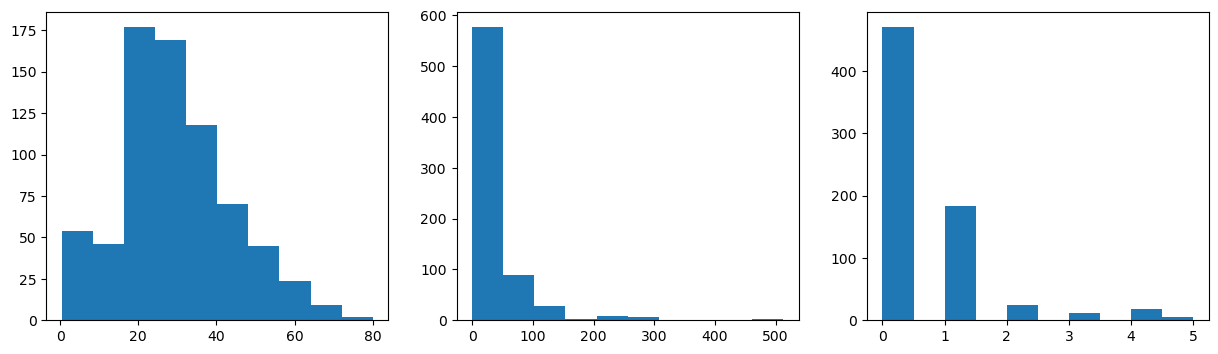

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(df['age'])   # edad
ax[1].hist(df['fare'])  # costo del pasaje
ax[2].hist(df['sibsp']) # familiares

plt.show()


#### Variantes del histograma de edad

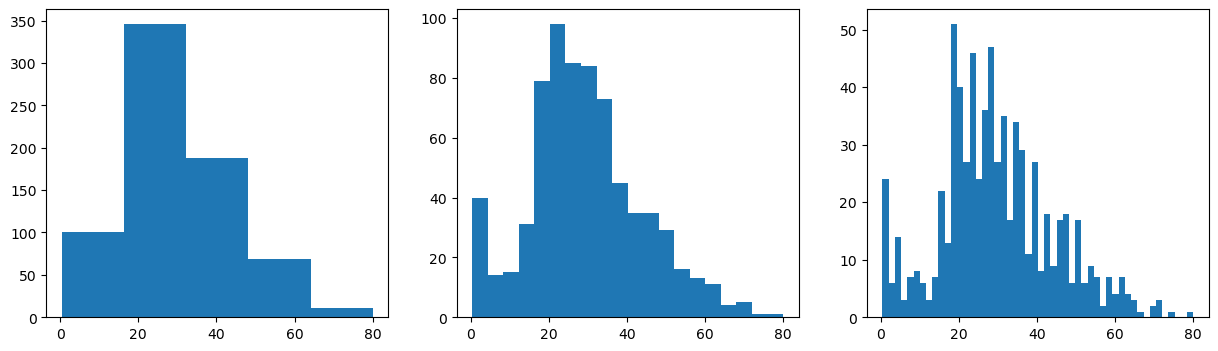

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(df['age'], bins=5)
ax[1].hist(df['age'], bins=20)
ax[2].hist(df['age'], bins=50)

plt.show()

### 1. Tendencia central (media, mediana y moda)

#### Media

In [7]:
np.mean(df['age'])    # con NumPy

29.69911764705882

In [8]:
df['age'].mean()      # con Pandas

29.69911764705882

#### Mediana

In [9]:
np.median(df['age'])  # con NumPy

28.0

In [10]:
df['age'].median()    # con Pandas

28.0

#### Moda

In [11]:
df['age'].mode()[0]                            # con Pandas

24.0

In [12]:
mode_age = st.mode(df['age'], keepdims=False)  # con SciPy
mode_age.mode

24.0

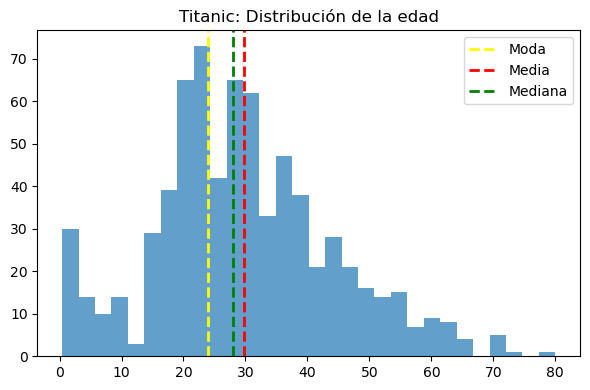

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(df['age'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(df['age'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(df['age'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(df['age'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('Titanic: Distribución de la edad')
ax.legend()

plt.tight_layout()
plt.show()

#### Comparamos la distribución de las tres variables: edad, costo del pasaje y número de familiares

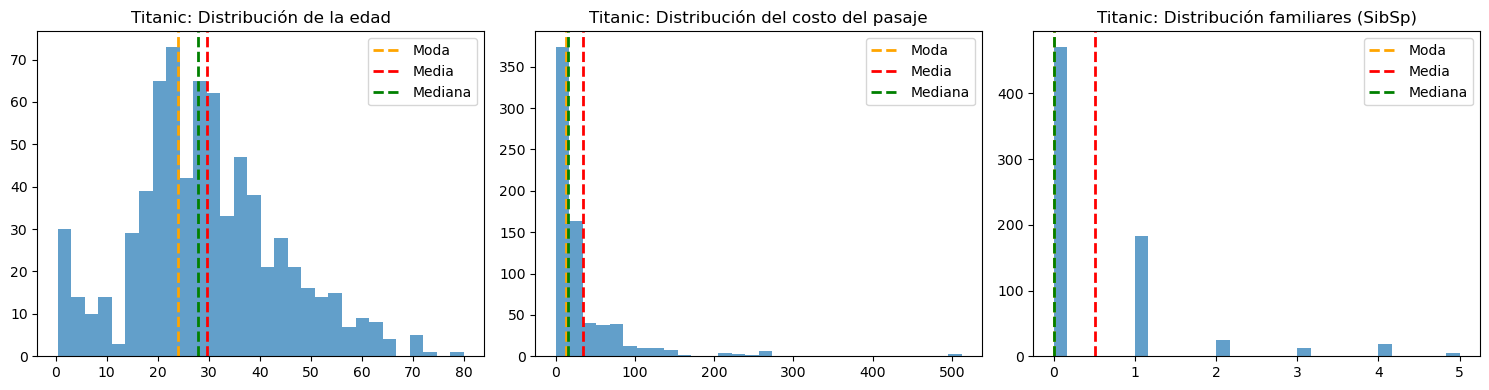

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Función para graficar
def plot_distribution(ax, data, title):
    ax.hist(data, bins=30, alpha=0.7) # dibujar histograma
    ax.axvline(data.mode()[0], color='orange', linestyle='dashed', linewidth=2, label='Moda') # dibujar la moda
    ax.axvline(data.mean(), color='red', linestyle='dashed', linewidth=2, label='Media') # dibujar la media
    ax.axvline(data.median(), color='green', linestyle='dashed', linewidth=2, label='Mediana') # dibujar la mediana
    ax.set_title(title)
    ax.legend()

plot_distribution(axes[0], df['age'], 'Titanic: Distribución de la edad')
plot_distribution(axes[1], df['fare'], 'Titanic: Distribución del costo del pasaje')
plot_distribution(axes[2], df['sibsp'], 'Titanic: Distribución familiares (SibSp)')

plt.tight_layout()
plt.show()

#### ¿Qué métrica representa mejor cada variable (edad, costo, familiares)?

### 2. Varianza y desviación estándar

In [15]:
# Cargamos el dataset de pingüinos (incluido en la biblioteca Seaborn)
pinguinos_df = sns.load_dataset('penguins') # sns.load_dataset Devuelve un Pandas DF
pinguinos_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [16]:
pinguinos_df = pinguinos_df.dropna()

In [17]:
pinguinos_df.columns = ['especie', 'isla', 'largo_pico', 'ancho_pico', 'largo_aleta', 'masa_corporal', 'sexo']    

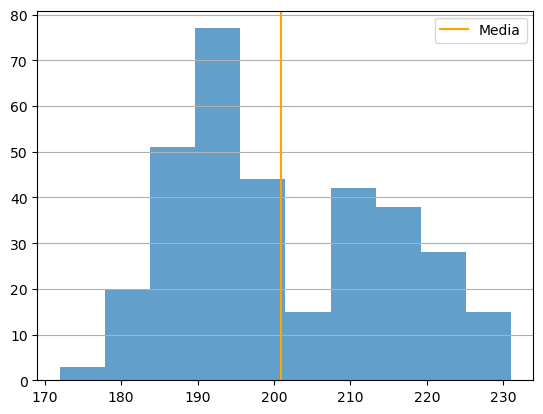

In [18]:
fig, ax = plt.subplots()
ax.hist(pinguinos_df['largo_aleta'], alpha=0.7)
ax.axvline(pinguinos_df['largo_aleta'].mean(), color='orange', label='Media') # dibujar la media   
ax.legend()
ax.grid(axis='y')
plt.show()

In [19]:
media = pinguinos_df['largo_aleta'].mean()
var = pinguinos_df['largo_aleta'].var()
std_dev = pinguinos_df['largo_aleta'].std()
print(f'La media del largo de las aletas es {media:.2f} mm., la varianza es {var:.4f} mm. y la desviación estándar es {std_dev:.4f} mm.')

La media del largo de las aletas es 200.97 mm., la varianza es 196.4417 mm. y la desviación estándar es 14.0158 mm.


### 3. Cuantiles y rango intercuartil

In [20]:
Q1 = pinguinos_df['largo_aleta'].quantile(0.25)
Q2 = pinguinos_df['largo_aleta'].quantile(0.50)  # Percentile 5-0 - Equivalente a la mediana
Q3 = pinguinos_df['largo_aleta'].quantile(0.75)

print("Q1 (25%):", Q1)
print("Q2 (Mediana, 50%):", Q2)
print("Q3 (75%):", Q3)

Q1 (25%): 190.0
Q2 (Mediana, 50%): 197.0
Q3 (75%): 213.0


In [21]:
IQR = Q3 - Q1
print("Rango intercuartil (IQR):", IQR)

Rango intercuartil (IQR): 23.0


#### Visualizamos estas variables con Boxplots

In [22]:
# para actualizar Seaborn a la versión seaborn-0.13.2
# pip install --upgrade seaborn

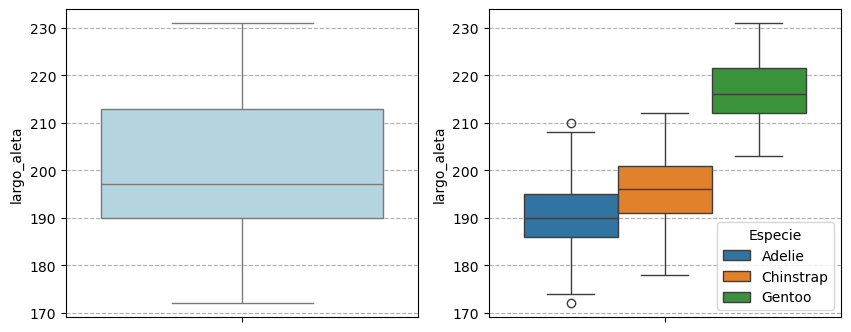

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=pinguinos_df, y='largo_aleta', color="lightblue", ax=ax[0])
sns.boxplot(data=pinguinos_df, y='largo_aleta', hue='especie', ax=ax[1])         # con seaborn-0.13.2

ax[0].grid(axis='y', ls='--')
ax[1].grid(axis='y', ls='--')
plt.legend(title='Especie', loc='lower right')


plt.show()

### 3. Skewness y curtosis

#### Skewness (Asimetría)

La **skewness** o **asimetría** mide la **asimetría** de una distribución de datos, es decir, si la distribución es más "desviada" hacia la izquierda o la derecha de su media.

La fórmula general de **skewness** es:

$$
\text{Skewness} = \frac{n}{(n-1)(n-2)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

donde:
- \( n \) es el tamaño de la muestra.
- \( x_i \) son los valores individuales.
- \( \bar{x} \) es la media de la muestra.
- \( s \) es la desviación estándar.

Cómo se interpreta:

- Asimetría positiva (skewness > 0): La cola de la distribución se extiende más hacia la derecha.
- Asimetría negativa (skewness < 0): La cola de la distribución se extiende más hacia la izquierda.
- Simetría (skewness = 0): La distribución es simétrica.


---

#### Curtosis

La **curtosis** mide la **altitud** y **ancho** de las colas de la distribución en comparación con una distribución normal. En otras palabras, la curtosis mide qué tan "altos" y "delgados" son los picos y colas de los datos.

La fórmula general de **curtosis** es:

$$
\text{Curtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum \left( \frac{x_i - \bar{x}}{s} \right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}
$$

donde:
- **n** es el tamaño de la muestra.
- **xᵢ** son los valores individuales.
- **x̄** es la media de la muestra.
- **s** es la desviación estándar.

Cómo se interpreta:

- Curtosis > 3 (leptocúrtico): La distribución tiene colas más gruesas y picos más altos que una distribución normal 
- Curtosis < 3 (platicúrtico): La distribución tiene colas más ligeras y picos más bajos que una distribución normal.
- Curtosis = 3 (mesocúrtico): Típico de una distribución normal.

In [24]:
# Skewness y curtosis para el largo de aletas de los pingüinos
skewness = st.skew(pinguinos_df['largo_aleta'])
curtosis = st.kurtosis(pinguinos_df['largo_aleta'])

print("Asimetría (Skewness):", skewness)
print("Curtosis:", curtosis)

Asimetría (Skewness): 0.358523654622741
Curtosis: -0.9648325874095063


#### QQPlot

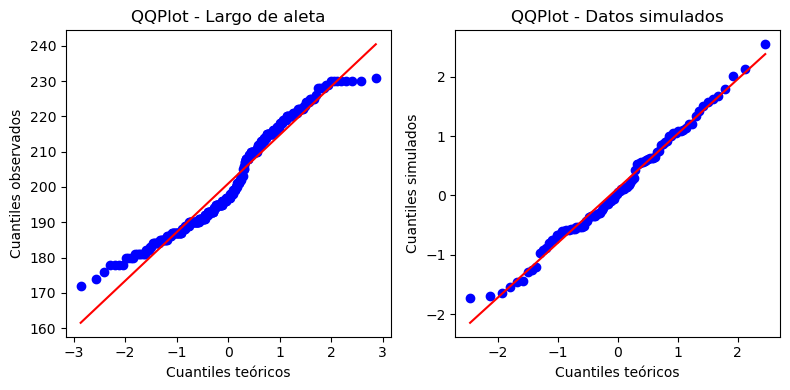

In [32]:
fig, (ax_ping, ax_normal) = plt.subplots(1, 2, figsize=(8, 4))

# QQPlot para largo de aleta de pingüinos
st.probplot(pinguinos_df['largo_aleta'], dist="norm", plot=ax_ping)
ax_ping.set_title("QQPlot - Largo de aleta")
ax_ping.set_xlabel("Cuantiles teóricos")
ax_ping.set_ylabel("Cuantiles observados")

# QQPlot para datos aleatorios con distribución normal
data = np.random.normal(loc=0, scale=1, size=100)
st.probplot(data, dist="norm", plot=ax_normal)
ax_normal.set_title("QQPlot - Datos simulados")
ax_normal.set_xlabel("Cuantiles teóricos")
ax_normal.set_ylabel("Cuantiles simulados")

plt.tight_layout()
plt.show()


### 4. Estadística descriptiva completa

In [ ]:
print("Estadística descriptiva del dataset Titanic:\n", df.describe())

In [ ]:
# estadística básica + percentiles
df.describe(percentiles=[.1,.9,.95])